In [1]:
%matplotlib inline

import nltk
from nltk.sentiment import vader
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import pandas as pd
import requests

C:\Users\Brian\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
sia = vader.SentimentIntensityAnalyzer()

def vaderSentiment(text):
    return sia.polarity_scores(text)['compound']

judgedSentiment = []
gatherTotal = []
runningTotal = 0

In [3]:
book = open ("C:\\DjangoPractice\\nltk\\Gutenberg\\pg2242.txt", "r", errors = "surrogateescape").read()

In [4]:
#rbook = requests.get('http://www.gutenberg.org/files/11/11-0.txt')
#book = rbook.text
book = ''.join([x for x in book if ord(x) < 128])

In [5]:
bookToken = sent_tokenize (book)

In [6]:
for i in bookToken:
    judgedSentiment.append(vaderSentiment(i))

In [7]:
for i in judgedSentiment:
    runningTotal =runningTotal + i
    gatherTotal.append(runningTotal)

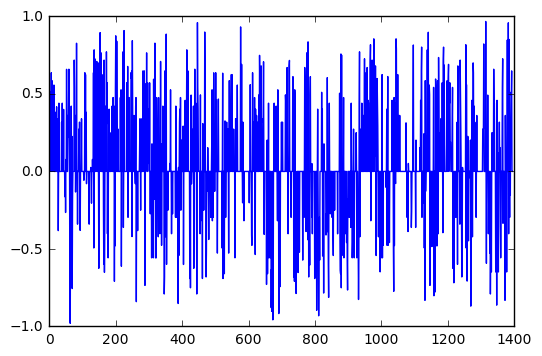

In [8]:
plt.plot(judgedSentiment)

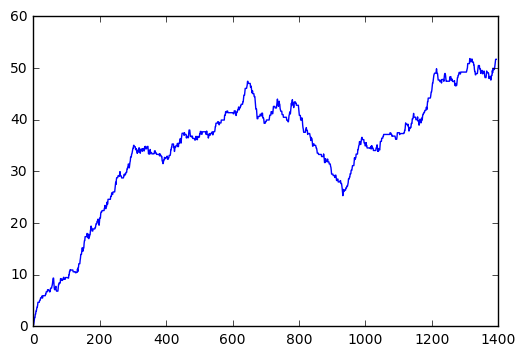

In [9]:
plt.plot(gatherTotal)

In [10]:
d = {'RawText':bookToken, 'Sentiment': judgedSentiment, 'RunningTotal': gatherTotal}
df = pd.DataFrame (data=d)

In [11]:
dfNeg = df.loc[(df['Sentiment']< -0.7)]
dfPos = df.loc[(df['Sentiment']> 0.5)]


In [15]:
dfPos.sort_values(by="Sentiment")

,RawText,RunningTotal,Sentiment
874,"And so farre blamelesse proues my enterprize,\...",33.3912,0.5046
4,We encourage you to keep this file on your own...,1.7349,0.5106
1390,"And as I am an honest Pucke,\nIf we haue vnear...",50.5633,0.5106
820,Why then you left me (O the gods forbid)\nIn e...,38.0883,0.5106
1238,Thankes courteous wall.,48.6839,0.5106
634,Your name honest Gentleman?,44.7595,0.5106
1204,"He hath rid his Prologue, like a rough Colt: h...",47.6199,0.5248
365,That very time I say (but thou couldst not)\nF...,33.9811,0.5267
199,"If then true Louers haue beene euer crost,\nIt...",20.1197,0.5267
739,"I see you are all bent\nTo set against me, for...",43.1414,0.5267


In [16]:
dfPos.loc[446]['RawText']

'But gentle friend, for loue and courtesie\nLie further off, in humane modesty,\nSuch separation, as may well be said,\nBecomes a vertuous batchelour, and a maide,\nSo farre be distant, and good night sweet friend;\nThy loue nere alter, till thy sweet life end\n\n   Lys.'